# Less Than oracle

inspirated by the Javier Sanchez-Rivero, Daniel Talaván, Jose Garcia-Alonso, Antonio Ruiz-Cortés and Juan Manuel Murillo paper, which you can find [here](https://arxiv.org/abs/2303.14959).\
Here are my thoughts and implementation of this algorithm.

In [1]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
import math

In [2]:
def show_unitary(qc):
    sim = AerSimulator()
    qc_unitary = qc.copy()
    qc_unitary.save_unitary()
    unitary = sim.run(transpile(qc_unitary, sim), shots=1000).result().get_unitary()
    display(array_to_latex(unitary, max_size=100000))

In [3]:
def plot_results(qc):
    sim = AerSimulator()
    result = sim.run(transpile(qc, sim), shots=1000).result().get_counts()
    display(plot_histogram(result))

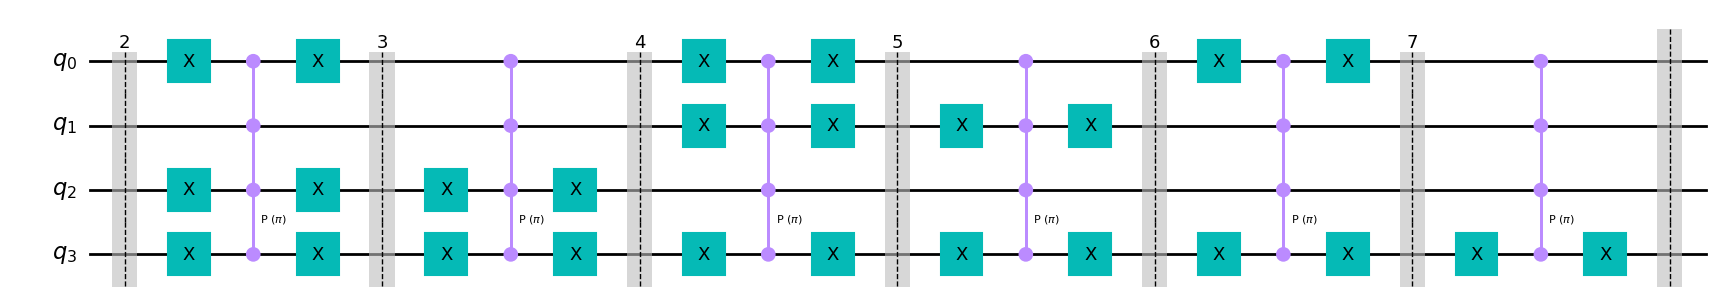

<IPython.core.display.Latex object>

In [4]:
"""
from 2 to 7

0010
0011
0100
0101
0110
0111

"""

oracle = QuantumCircuit(4, name="oracle")

#0010
oracle.barrier(label="2")
oracle.x([0, 2, 3])
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x([0, 2, 3])

#0011
oracle.barrier(label="3")
oracle.x([2, 3])
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x([2, 3])

#0100
oracle.barrier(label="4")
oracle.x([0, 1, 3])
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x([0, 1, 3])

#0101
oracle.barrier(label="5")
oracle.x([1, 3])
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x([1, 3])

#0110
oracle.barrier(label="6")
oracle.x([0, 3])
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x([0, 3])

#0111
oracle.barrier(label="7")
oracle.x(3)
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x(3)

oracle.barrier()

display(oracle.draw('mpl')) 
show_unitary(oracle)

In [47]:
def diffuser(n_qubits):
    iterator_n_qubits = range(n_qubits)
    diffuser = QuantumCircuit(n_qubits, name="diffuser")
    diffuser.h(iterator_n_qubits)
    diffuser.x(iterator_n_qubits)
    diffuser.h(0)
    diffuser.mct(list(range(1, n_qubits)), 0)
    diffuser.h(0)
    diffuser.x(iterator_n_qubits)
    diffuser.h(iterator_n_qubits)
    return diffuser

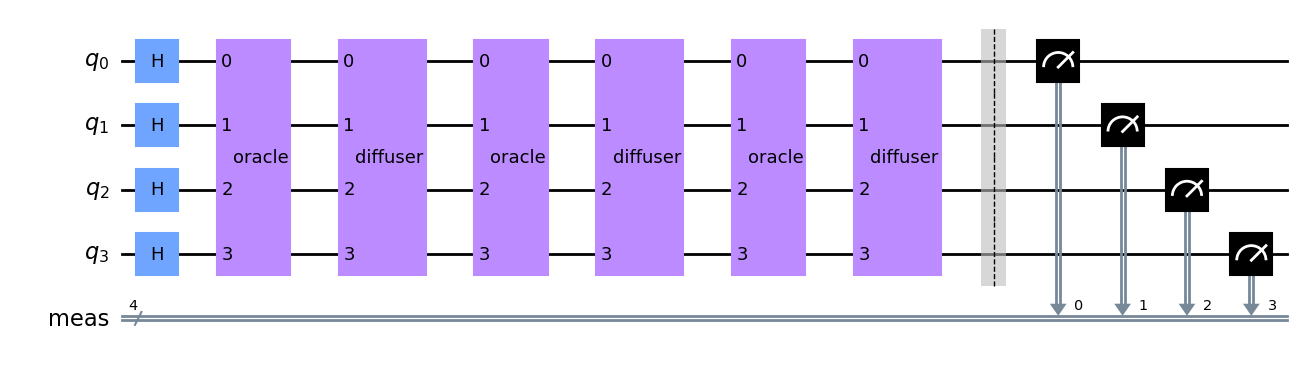

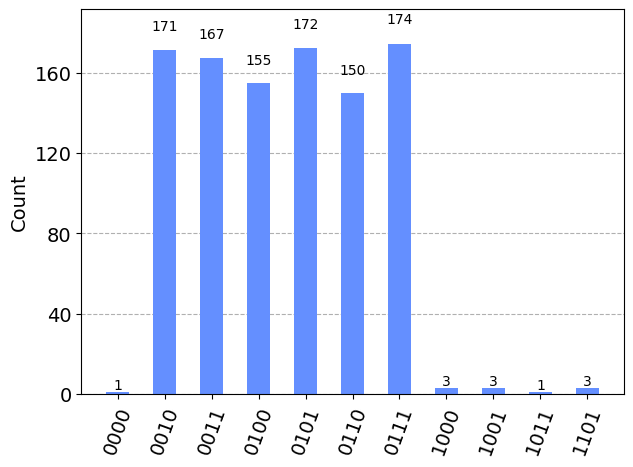

In [49]:
qc_test_1 = QuantumCircuit(4)
diffuser_test_1 = diffuser(4)
iterator_4_qubits = range(4)
qc_test_1.h(iterator_4_qubits)
qc_test_1.append(oracle, iterator_4_qubits)
qc_test_1.append(diffuser_test_1, iterator_4_qubits)
qc_test_1.append(oracle, iterator_4_qubits)
qc_test_1.append(diffuser_test_1, iterator_4_qubits)
qc_test_1.append(oracle, iterator_4_qubits)
qc_test_1.append(diffuser_test_1, iterator_4_qubits)
qc_test_1.measure_all()
display(qc_test_1.draw('mpl'))
plot_results(qc_test_1)

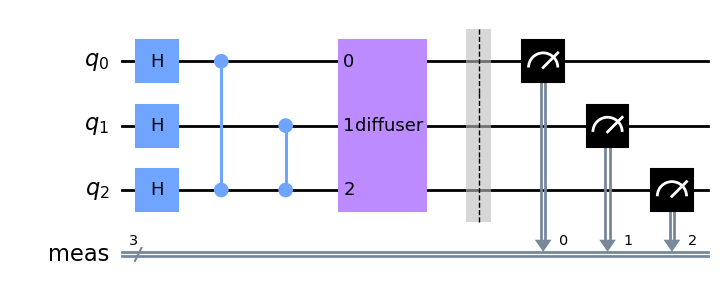

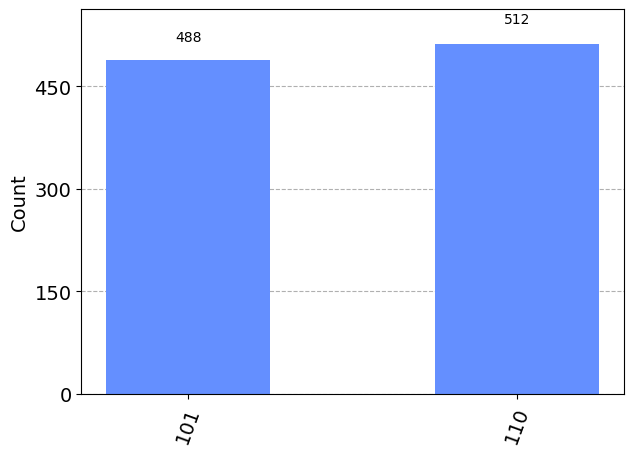

In [63]:
qc_test_2 = QuantumCircuit(3)
qc_test_2.h(range(3))
qc_test_2.cz(2, 0)
qc_test_2.cz(1, 2)
qc_test_2.append(diffuser(3), range(3))
qc_test_2.measure_all()
display(qc_test_2.draw('mpl'))
plot_results(qc_test_2)

---

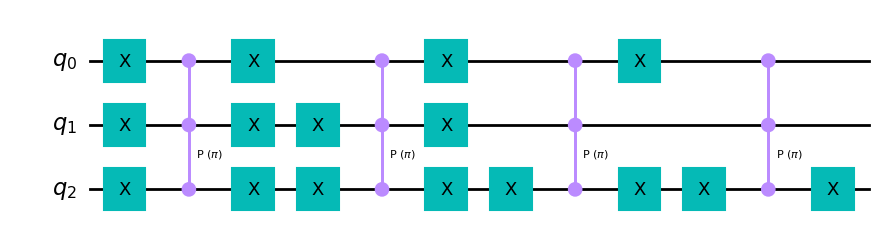

<IPython.core.display.Latex object>

In [74]:
oracle_less_than_4 = QuantumCircuit(3, name="<4")

#000
oracle_less_than_4.x(range(3))
oracle_less_than_4.mcp(math.pi, [2, 1], 0)
oracle_less_than_4.x(range(3))

#001
oracle_less_than_4.x(range(1, 3))
oracle_less_than_4.mcp(math.pi, [2, 1], 0)
oracle_less_than_4.x(range(1, 3))

#010
oracle_less_than_4.x([0, 2])
oracle_less_than_4.mcp(math.pi, [2, 1], 0)
oracle_less_than_4.x([0,2])

#011
oracle_less_than_4.x(2)
oracle_less_than_4.mcp(math.pi, [2, 1], 0)
oracle_less_than_4.x(2)

display(oracle_less_than_4.draw('mpl'))
show_unitary(oracle_less_than_4)

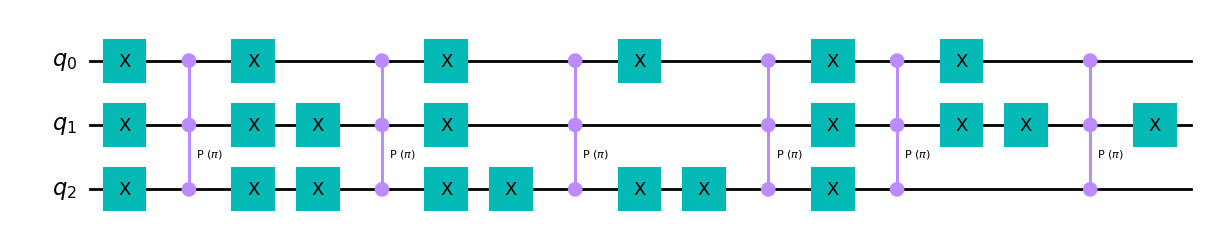

<IPython.core.display.Latex object>

In [77]:
oracle_less_than_6 = QuantumCircuit(3, name="<6")

#000
oracle_less_than_6.x(range(3))
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x(range(3))

#001
oracle_less_than_6.x(range(1, 3))
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x(range(1, 3))

#010
oracle_less_than_6.x([0, 2])
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x([0,2])

#011
oracle_less_than_6.x(2)
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x(2)

#100
oracle_less_than_6.x(range(0, 2))
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x(range(0, 2))

#101
oracle_less_than_6.x(1)
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x(1)

display(oracle_less_than_6.draw('mpl'))
show_unitary(oracle_less_than_6)

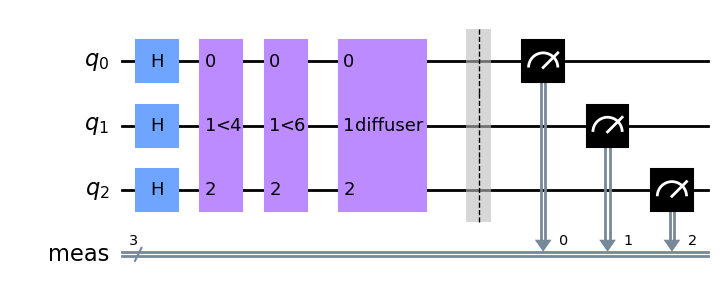

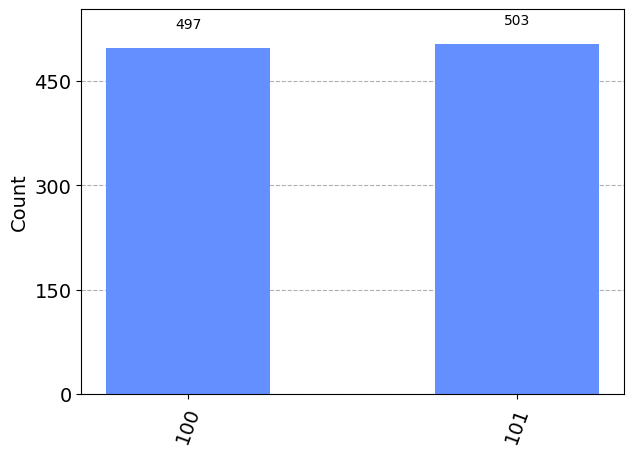

In [81]:
qc_test_3 = QuantumCircuit(3)
qc_test_3_diffuser = diffuser(3)

qc_test_3.h(range(3))
qc_test_3.append(oracle_less_than_4, range(3))
qc_test_3.append(oracle_less_than_6, range(3))
qc_test_3.append(qc_test_3_diffuser, range(3))
qc_test_3.measure_all()
display(qc_test_3.draw('mpl'))
plot_results(qc_test_3)

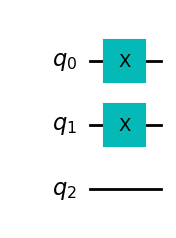

<IPython.core.display.Latex object>

In [97]:
add_two_oracle = QuantumCircuit(3, name="+2")
#add_two_oracle.z(range(3))
add_two_oracle.x(range(2))
display(add_two_oracle.draw('mpl'))
show_unitary(add_two_oracle)

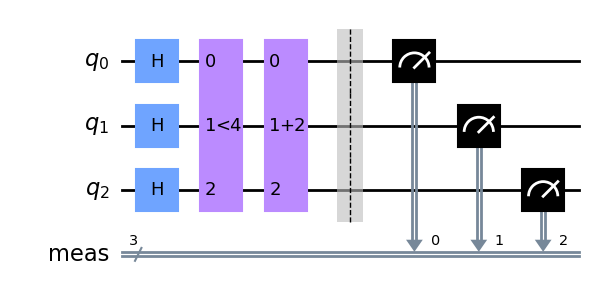

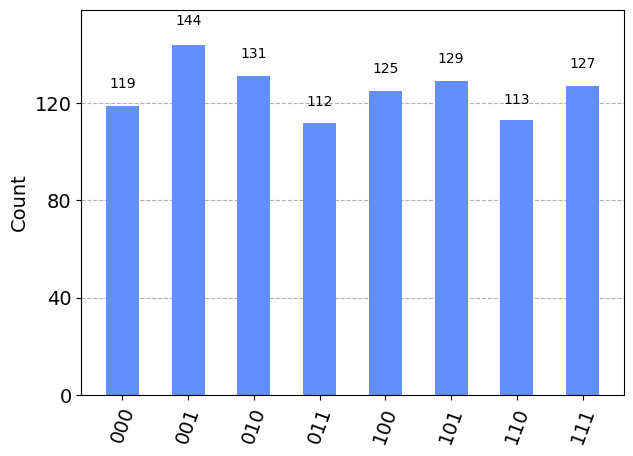

In [102]:
qc_test_3 = QuantumCircuit(3)
qc_test_3_diffuser = diffuser(3)

qc_test_3.h(range(3))
qc_test_3.append(oracle_less_than_4, range(3))
qc_test_3.append(add_two_oracle, range(3))
qc_test_3.measure_all()
display(qc_test_3.draw('mpl'))
plot_results(qc_test_3)

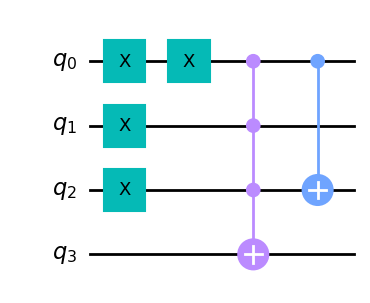

<IPython.core.display.Latex object>

In [107]:
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(4)
# Encoding 3 (0011)
qc.x(0)  # Flip the first qubit to |1⟩
qc.x(1)  # Flip the second qubit to |1⟩

# Encoding 5 (0101)
qc.x(2)  # Flip the third qubit to |1⟩
qc.x(0)  # Flip the first qubit to |0⟩

# Quantum Addition
qc.mct([0, 1, 2], 3)  # Apply a Toffoli gate for the carry
qc.cx(0, 2)     # Apply a CNOT gate to the second qubit

# The result is now in qubits 2, 3, and 0


display(qc.draw('mpl'))
display(Statevector(qc).draw('latex'))